# Projet Python for Data Analysis

###### Par Germinal CORREIA

### Importation des librairies et modules

In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

### Importation du dataset

On récupère le noms des variables à étudier sous la forme d'une liste.

In [2]:
with open('features.txt', 'r') as f:
    features_name = f.readlines()
features_name = [item.strip() for item in features_name] #On enlève les espaces

On récupère les noms des activités sous la forme d'un dictionnaire.

In [3]:
with open('activity_labels.txt', 'r') as f:
    activity_labels = f.readlines()
activity_labels = [item.strip().split(' ') for item in activity_labels] #On enlève les espaces
activity_labels = dict((item[0], item[1]) for item in activity_labels) #On convertit en dictionnaire

On importe les bases d'apprentissage et de tests.

In [4]:
#Création de la base d'apprentissage
train_df = pd.read_csv('Train/X_train.txt', sep=" ", header=None) #Lecture du fichier à l'aide de Panda
train_df.columns = features_name #Modification des noms de colonnes

#On crée ensuite une nouvelle colonne contenant la variable cible "activity"
with open('Train/y_train.txt', 'r') as f: 
    train_activity = f.readlines()
train_activity = [item.strip() for item in train_activity] #On enlève les espaces
train_activity = [activity_labels.get(item,item) for item in train_activity] #On remplace les labels par les noms des actions
train_df['activity'] = train_activity
train_df['activity'] = train_df['activity'].astype('str')

print(train_df)

      tBodyAcc-Mean-1  tBodyAcc-Mean-2  tBodyAcc-Mean-3  tBodyAcc-STD-1  \
0            0.043580        -0.005970        -0.035054       -0.995381   
1            0.039480        -0.002131        -0.029067       -0.998348   
2            0.039978        -0.005153        -0.022651       -0.995482   
3            0.039785        -0.011809        -0.028916       -0.996194   
4            0.038758        -0.002289        -0.023863       -0.998241   
5            0.038988         0.004109        -0.017340       -0.997438   
6            0.039897        -0.005324        -0.020457       -0.997024   
7            0.039082        -0.016047        -0.030241       -0.996662   
8            0.039026        -0.007410        -0.027301       -0.997431   
9            0.040354         0.004245        -0.017932       -0.994906   
10           0.038860         0.001515        -0.016256       -0.994918   
11           0.038597        -0.007104        -0.019296       -0.998349   
12           0.039495    

In [5]:
test_df = pd.read_csv('Test/X_test.txt', sep=" ", header=None) #Lecture du fichier à l'aide de Panda
test_df.columns = features_name #Modification des noms de colonnes

#On crée ensuite une nouvelle colonne contenant la variable cible "activity"
with open('Test/y_test.txt', 'r') as f:
    test_activity = f.readlines()
test_activity = [item.strip() for item in test_activity] #On enlève les espaces
test_activity = [activity_labels.get(item,item)  for item in test_activity] #On remplace les labels par les noms des actions
test_df["activity"] = test_activity

print(test_df)

      tBodyAcc-Mean-1  tBodyAcc-Mean-2  tBodyAcc-Mean-3  tBodyAcc-STD-1  \
0            0.030914        -0.008927         0.040382       -0.938504   
1            0.042548         0.001079        -0.026236       -0.975516   
2            0.038297        -0.011660        -0.025643       -0.993922   
3            0.036205        -0.018148        -0.025240       -0.994845   
4            0.038034        -0.013437        -0.032899       -0.993955   
5            0.039803        -0.004316        -0.022932       -0.994558   
6            0.040015        -0.003970        -0.016615       -0.995922   
7            0.037940        -0.010657        -0.024800       -0.995697   
8            0.037105        -0.006622        -0.023296       -0.996887   
9            0.038402         0.003838        -0.013920       -0.998476   
10           0.039551        -0.000966        -0.013367       -0.998888   
11           0.039776        -0.007537        -0.020271       -0.997884   
12           0.037917    

### Analyse du dataset

###### Données manquantes

In [6]:
train_df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7767 entries, 0 to 7766
Data columns (total 562 columns):
tBodyAcc-Mean-1                    7767 non-null float64
tBodyAcc-Mean-2                    7767 non-null float64
tBodyAcc-Mean-3                    7767 non-null float64
tBodyAcc-STD-1                     7767 non-null float64
tBodyAcc-STD-2                     7767 non-null float64
tBodyAcc-STD-3                     7767 non-null float64
tBodyAcc-Mad-1                     7767 non-null float64
tBodyAcc-Mad-2                     7767 non-null float64
tBodyAcc-Mad-3                     7767 non-null float64
tBodyAcc-Max-1                     7767 non-null float64
tBodyAcc-Max-2                     7767 non-null float64
tBodyAcc-Max-3                     7767 non-null float64
tBodyAcc-Min-1                     7767 non-null float64
tBodyAcc-Min-2                     7767 non-null float64
tBodyAcc-Min-3                     7767 non-null float64
tBodyAcc-SMA-1                     77

In [7]:
test_df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3162 entries, 0 to 3161
Data columns (total 562 columns):
tBodyAcc-Mean-1                    3162 non-null float64
tBodyAcc-Mean-2                    3162 non-null float64
tBodyAcc-Mean-3                    3162 non-null float64
tBodyAcc-STD-1                     3162 non-null float64
tBodyAcc-STD-2                     3162 non-null float64
tBodyAcc-STD-3                     3162 non-null float64
tBodyAcc-Mad-1                     3162 non-null float64
tBodyAcc-Mad-2                     3162 non-null float64
tBodyAcc-Mad-3                     3162 non-null float64
tBodyAcc-Max-1                     3162 non-null float64
tBodyAcc-Max-2                     3162 non-null float64
tBodyAcc-Max-3                     3162 non-null float64
tBodyAcc-Min-1                     3162 non-null float64
tBodyAcc-Min-2                     3162 non-null float64
tBodyAcc-Min-3                     3162 non-null float64
tBodyAcc-SMA-1                     31

On voit que les colonnes ont toutes marqués "non-null". Ce dataset est donc totalement complet, il n'y aucune donnée manquante.

######  Répartition des actions

In [8]:
train_df.groupby(['activity']).size().sort_values(ascending=False)

activity
STANDING              1423
LAYING                1413
SITTING               1293
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     987
STAND_TO_LIE            90
SIT_TO_LIE              75
LIE_TO_SIT              60
LIE_TO_STAND            57
STAND_TO_SIT            47
SIT_TO_STAND            23
dtype: int64

In [9]:
test_df.groupby(['activity']).size().sort_values(ascending=False)

activity
STANDING              556
LAYING                545
SITTING               508
WALKING               496
WALKING_UPSTAIRS      471
WALKING_DOWNSTAIRS    420
STAND_TO_LIE           49
SIT_TO_LIE             32
LIE_TO_STAND           27
LIE_TO_SIT             25
STAND_TO_SIT           23
SIT_TO_STAND           10
dtype: int64

On voir que les actions sont répartis inéquitablement selon leur groupe. 
Beaucoup d'expériences sur l'état de l'utilisateur comparés à ceux sur le changement de position (assis à debout, debout à allongé etc).

[Text(0, 0, 'STANDING'),
 Text(0, 0, 'STAND_TO_SIT'),
 Text(0, 0, 'SITTING'),
 Text(0, 0, 'SIT_TO_STAND'),
 Text(0, 0, 'STAND_TO_LIE'),
 Text(0, 0, 'LAYING'),
 Text(0, 0, 'LIE_TO_SIT'),
 Text(0, 0, 'SIT_TO_LIE'),
 Text(0, 0, 'LIE_TO_STAND'),
 Text(0, 0, 'WALKING'),
 Text(0, 0, 'WALKING_DOWNSTAIRS'),
 Text(0, 0, 'WALKING_UPSTAIRS')]

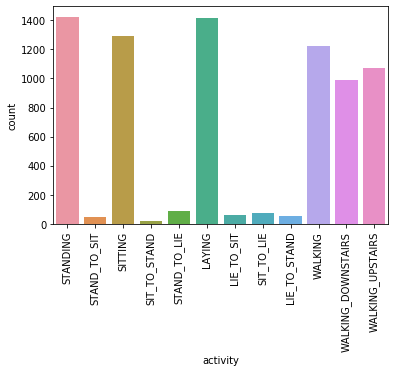

In [10]:
g = sn.countplot(train_df['activity'],label="Count")
g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [59]:
X = train_df[['tYAxisAcc-AngleWRTGravity-1','tZAxisAcc-AngleWRTGravity-1','tBodyAcc-Mad-2']]
y = train_df[['activity']]
cmap = cm.get_cmap('gnuplot')
scatter = scatter_matrix(X, alpha=0.5, figsize=None, ax=None, grid=False, diagonal='hist', marker='.', density_kwds=None, hist_kwds=None, range_padding=0.05)
plt.suptitle('Scatter-matrix for each input variable')
#plt.savefig('fruits_scatter_matrix')

KeyError: "None of [Index(['tYAxisAcc-AngleWRTGravity-1', 'tZAxisAcc-AngleWRTGravity-1',\n       'tBodyAcc-Mad-2'],\n      dtype='object')] are in the [columns]"

###### Etude de la corrélation des variables

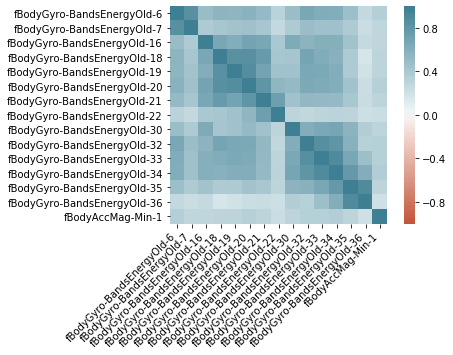

In [54]:
corr = train_df.iloc[:,160:175].corr() #Matrice de corrélation sur les colonnes 160 à 174
ax = sn.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sn.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

On observe que certaines variables sont très corrélées entre elles. On peut donc en supprimer certaines.

In [19]:
corr = train_df.corr().abs() #Matrice de corrélation en valeur absolue sur tout le dataframe

#On simplifie l'opération en ne travaillant que sur le triangle supérieur de la matrice
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))

# On supprime toutes les colonnes qui sont corrélées à plus de 90%
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]
train_df = train_df.drop(columns=to_drop)

In [20]:
test_df = test_df.drop(columns=to_drop) #Même opération pour la base de test

In [21]:
print(train_df.shape)

(7767, 195)


On passe de **562** à **195 colonnes**.

In [22]:
print(train_df.columns)

Index(['tBodyAcc-Mean-1', 'tBodyAcc-Mean-2', 'tBodyAcc-Mean-3',
       'tBodyAcc-STD-1', 'tBodyAcc-STD-2', 'tBodyAcc-STD-3', 'tBodyAcc-Min-3',
       'tBodyAcc-Energy-2', 'tBodyAcc-Energy-3', 'tBodyAcc-ARCoeff-1',
       ...
       'fBodyGyroMag-Skewness-1', 'fBodyGyroJerkMag-Min-1',
       'fBodyGyroJerkMag-MaxInds-1', 'fBodyGyroJerkMag-MeanFreq-1',
       'fBodyGyroJerkMag-Skewness-1', 'tBodyAcc-AngleWRTGravity-1',
       'tBodyAccJerk-AngleWRTGravity-1', 'tBodyGyro-AngleWRTGravity-1',
       'tBodyGyroJerk-AngleWRTGravity-1', 'activity'],
      dtype='object', length=195)


In [23]:
#print(train_df.iloc[:,192:])
train_df_melt = pd.melt(train_df.iloc[:,192:], "activity", var_name="measurement")


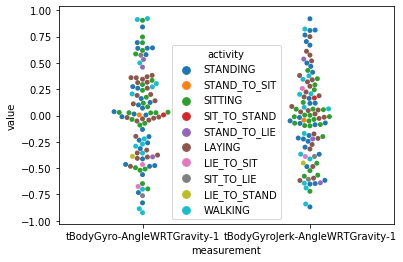

In [26]:
#sns.set(style="whitegrid", palette="muted")

# "Melt" the dataset to "long-form" or "tidy" representation
train_df_melt = pd.melt(train_df.iloc[:100,192:], "activity", var_name="measurement")

# Draw a categorical scatterplot to show each observation
sn.swarmplot(x="measurement", y="value", hue="activity", data=train_df_melt)

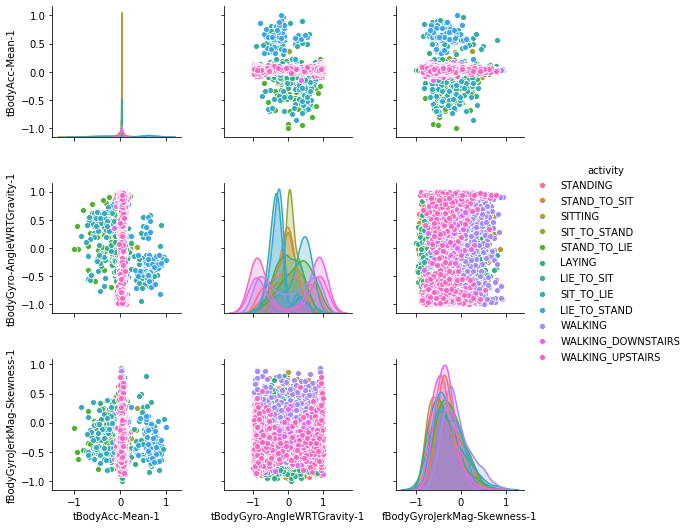

In [29]:
sn.pairplot(train_df, hue="activity", vars=['tBodyAcc-Mean-1', 'tBodyGyro-AngleWRTGravity-1', 'fBodyGyroJerkMag-Skewness-1'])

[Text(0, 0, 'STANDING'),
 Text(0, 0, 'STAND_TO_SIT'),
 Text(0, 0, 'SITTING'),
 Text(0, 0, 'SIT_TO_STAND'),
 Text(0, 0, 'STAND_TO_LIE'),
 Text(0, 0, 'LAYING'),
 Text(0, 0, 'LIE_TO_SIT'),
 Text(0, 0, 'SIT_TO_LIE'),
 Text(0, 0, 'LIE_TO_STAND'),
 Text(0, 0, 'WALKING'),
 Text(0, 0, 'WALKING_DOWNSTAIRS'),
 Text(0, 0, 'WALKING_UPSTAIRS')]

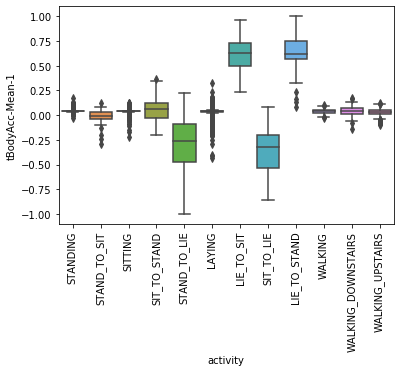

In [39]:
g = sn.boxplot(x="activity", y="tBodyAcc-Mean-1", data=train_df)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

### Modèles de machine learning

In [40]:
X_train = train_df.iloc[:,:193]  #Variables d'études de la base d'apprentissage
y_train = train_df.iloc[:,194] #Variables cible de la base d'apprentissage
X_test = test_df.iloc[:,:193] #Variables d'études de la base de tests
y_test = test_df.iloc[:,194] #Variables cible de la base de tests

######  Logistic Regression

In [41]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'.format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

C:\Users\agerm\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\agerm\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy of Logistic regression classifier on training set: 0.97
Accuracy of Logistic regression classifier on test set: 0.92


######  Decision Tree Classifier

In [42]:
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.82


######  K Neighbors Classifier

In [43]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.96
Accuracy of K-NN classifier on test set: 0.83


######  Linear Discriminant Analysis

In [44]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'.format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'.format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.96
Accuracy of LDA classifier on test set: 0.91


######  Gaussian Naive Bayes

In [45]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'.format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'.format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.81
Accuracy of GNB classifier on test set: 0.82


######  Support Vector Machine

In [46]:
svm = SVC(gamma='auto')
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'.format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'.format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.93
Accuracy of SVM classifier on test set: 0.89


######  Comparaison de la précision des modèles

In [47]:
results = pd.DataFrame({'model': ['Logistic Regression',
                                  'Decision Tree Classifier',
                                 'K Neighbors Classifier',
                                 'Linear Discriminant Analysis',
                                 'Gaussian Naive Bayes',
                                 'Support Vector Machine'], 
                        'train': [logreg.score(X_train, y_train),
                                          clf.score(X_train, y_train),
                                          knn.score(X_train, y_train),
                                          lda.score(X_train, y_train),
                                          gnb.score(X_train, y_train),
                                          svm.score(X_train, y_train)], 
                        'test': [logreg.score(X_test, y_test),
                                         clf.score(X_test, y_test),
                                         knn.score(X_test, y_test),
                                         lda.score(X_test, y_test),
                                         gnb.score(X_test, y_test),
                                         svm.score(X_test, y_test)]})

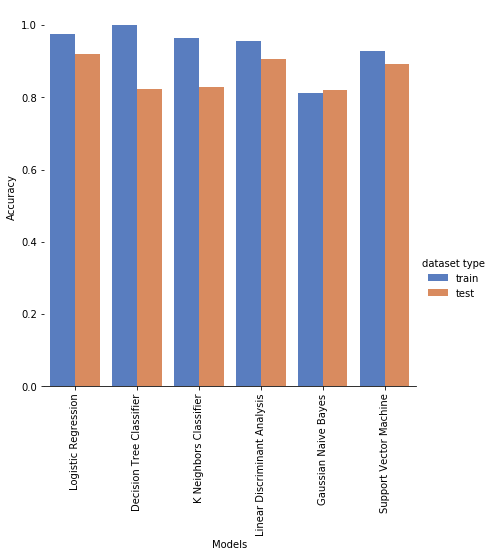

In [57]:
results_melt = pd.melt(results, "model", var_name="dataset type", value_name="accuracy")
g = sn.catplot(x="model", y="accuracy", hue="dataset type", data=results_melt,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_xlabels("Models")
g.set_ylabels("Accuracy")
g.set_xticklabels(rotation=90)

Tous les modèles donnent de très bons résultast (précision sur base de tests comprise entre *82%* et *92%*).

Le modèle de **Decision Tree Classifier** semble tout de même un peu overfeat (précision à *100%* pour la base d'apprentissage).

**Logistic Regression** semble être le modèle présentant les meilleurs résultats (précision de respectivement *97%* et *92%* pour les bases d'apprentissages et de tests).

### API Django